## SESSION05_회귀 심화🤓

### 1. 다중선형회귀의 기본가정

##### <span style="background-color:#FFF5F7; color:#000000; padding:4px; border-radius:5px;"> 가정1: 선형성(linearity) </span>
$E(y|X) = \beta_1+\beta_2X_2+...+\beta_nX_n$                 

⬆︎ 종속변수와 설명변수 간의 관계 선형적         

`검증 방법: scatter plot 찍어보기`

##### <span style="background-color:#FFF5F7; color:#000000; padding:4px; border-radius:5px;"> 가정2: 독립성(Independence) </span>
$X_i, X_j \ is \ linearly\ independent \ for\ all \ i,j$               

⬆︎ 각각의 설명 변수 서로 선형독립적
- 선형독립적 X => 다중공선성 O       

`검증 방법: VIF 지수, 상관계수`

##### <span style="background-color:#FFF5F7; color:#000000; padding:4px; border-radius:5px;"> 가정3: 오차항의 평균은 0에 가까워야 한다. </span>
$E(\varepsilon_i|X_i) = 0$

- 오차항($\epsilon$): 실제 값과 예측 값 사이의 차이 
- 백색 잡음: 특정 패턴 없이 랜덤하게 변하는 신호
- 오차항의 평균 0 => 백색 잡음의 성질 만족          

`검증 방법: np.mean(residuals)`

##### <span style="background-color:#FFF5F7; color:#000000; padding:4px; border-radius:5px;"> 가정4: 등분산성(Homoscedasticity) </span>
$Var(\varepsilon_i|X_i) = \sigma^2$             

⬆︎ 오차항$(\epsilon)$의 분산($\sigma^2$)이 일정
- 오차항의 분산이 일정하지 않다면? **이분산성** => 회귀 분석의 결과 부정확           

`검증 방법: 잔차의 도표화`

##### <span style="background-color:#FFF5F7; color:#000000; padding:4px; border-radius:5px;"> 가정5: 오차항은 자기상관되어 있지 않다.(non-autocorrelation) </span>
$Cov(\varepsilon_i, \varepsilon_j|X_i) =0$           

⬆︎ 오차항의 공분산(Cov) 항상 0
- 오차항의 공분산이 0이 아니면? **자기상관** => 이전 데이터의 패턴을 학습하여 반복적인 오류 발생 
- 공분산? 두 변수가 어떻게 함께 변하는지          
Cov(X,Y)>0: X가 증가하면 Y도 증가하는 관계(양의 상관관계)        
Cov(X,Y)<0: X가 증가하면 Y는 감소하는 관계(음의 상관관계)         
Cov(X,Y)=0: X와 Y는 **독립적**인 관계             
 
`검증 방법: Durbin-Waston 검정(분석 후)`


##### <span style="background-color:#FFF5F7; color:#000000; padding:4px; border-radius:5px;"> 가정6(선택): 정규성(normality).(non-autocorrelation) </span>
$\varepsilon_i \sim N(0, \sigma^2)$        

⬆︎ 오차항이 정규분포를 따른다.
- 가정6은 위배되어도 결과에 큰 영향 X

`검증 방법: Shapiro-Wilk 검증, Q-Q plot`

### 2. 회귀분석 평가방법

##### <span style="background-color:#FFDDEB; color:#000000; padding:4px; border-radius:5px;"> 2-1. 시각화 </span>
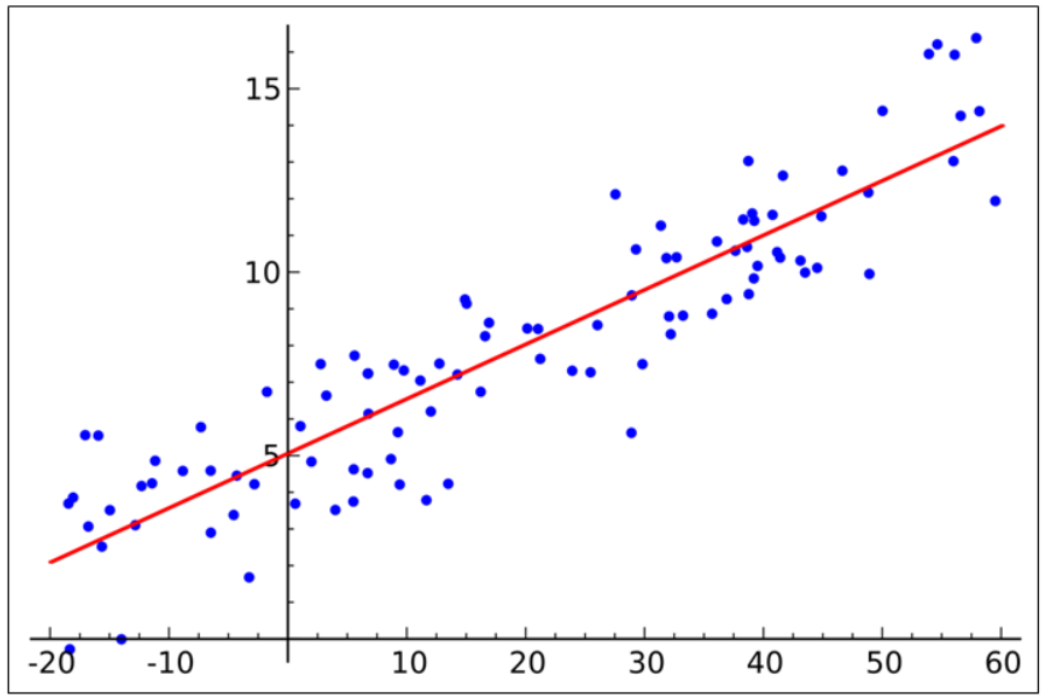


##### <span style="background-color:#FFDDEB; color:#000000; padding:4px; border-radius:5px;"> 2-1. 통계지표 </span>

> #### 모델의 유의성 검정       

`F-statistic: 회귀 모델이 유의미한지 검정`    

귀무가설 $H_0$: 모든 회귀 계수가 0이다.      
대립가설 $H_1$: 적어도 하나의 회귀 계수는 0이 아니다.      
F-statistic 값이 클수록 통계적으로 유의미하다!       

`Prob(F-statistic): F-statistic의 p-value 값`    

Prob < 0.05 => 귀무가설 기각              

`T-statistic: 각 독립 변수가 종속 변수 y에 유의미한 영향을 미치는지`     

귀무가설 $H_0$: 해당 변수의 회귀 계수가 0이다.      
대립가설 $H_1$: 해당 변수의 회귀 계수는 0이 아니다.

`p-value(P>|t|)`    

(P>|t|) < 0.05 => 종속 변수에 유의미한 영향을 미친다.      
(P>|t|) > 0.05 => 종속 변수에 유의미한 영향을 미치지 않는다.


> #### 모델의 성능 평가
`결정 계수 (R-squared, R^2): 회귀 분석에서 모델이 설명하는 데이터의 총 변동 중에서 설명된 비율`
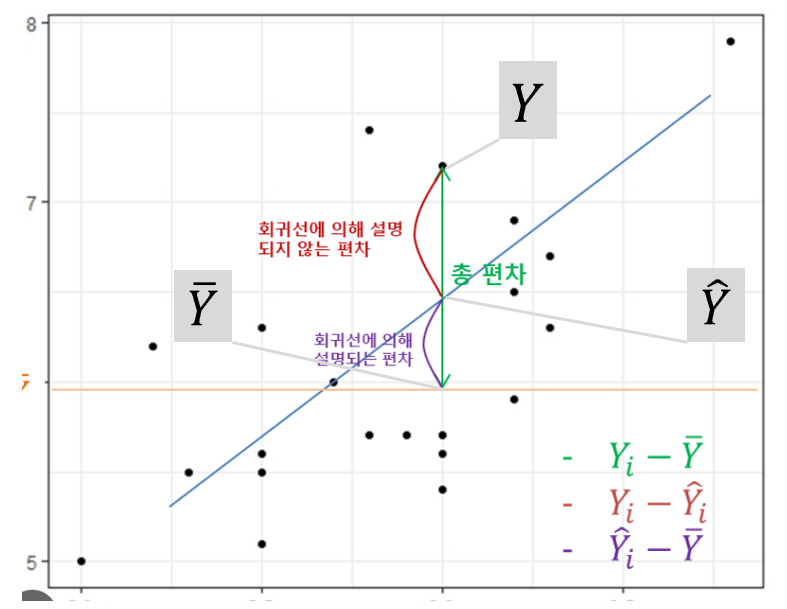    

⬆︎ $\bar{Y}$: 평균 / $\hat{Y}$: 예측 값 / $Y$: 실제 값     
노란선: 평균, 초록선: SST, 보라선: SSR, 빨간선: SSE       
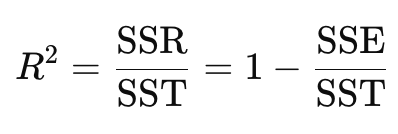        
⬆︎ 1에 가까울수록 SSR, SST 값 비슷, SSE 0에 가까워짐      

- R-squared가 0이면? 데이터들의 평균을 구한 것과 모델로 예측한 것 동일 => 모델이 데이터를 설명 X        

`조정된 결정 계수 (Adjusted R-squared, Adjusted R^2): 변수의 개수 증가에 덜 민감하도록 조정한 지표`          

## $\overline{R}^2 = \frac{SSR}{SST}\frac{n-1}{n-k}=1-(\frac{SSE/(n-k)}{SST/(n-1)})$     

`AIC: Akaike information criterion`      

`BIC(SC): Bayesian Information Criterion(Schwarz Criterion)`
- AIC, BIC(SC) 모두 값이 낮을수록 좋다!

### 3. 비선형 회귀
- 데이터셋의 분포가 선형적이지 않을 때

##### <span style="background-color:#FFC0CB; color:#000000; padding:4px; border-radius:5px;"> 3-1. 다항식 회귀모델(Polynomial regression model)  </span>
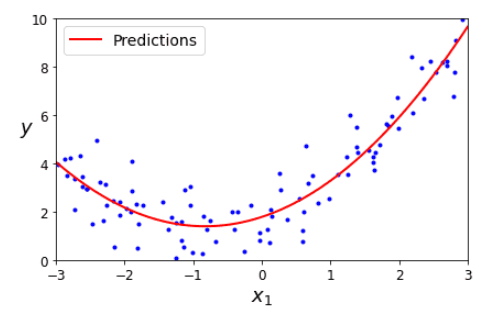     

$Y=a+bX+cX^2+dX^3+\cdot\cdot\cdot$
- 독립 변수에 거듭제곱 항을 추가하여 데이터의 곡선적(비선형적) 특성 모델링    

> 사용 방법       
1. 기존의 선형 모델 $Y = a + bX$에 대해 $cX^2, dX^3$ 등을 포함하여 모델을 확장
2. 확장한 상태에 선형 회귀를 적용

##### <span style="background-color:#FFC0CB; color:#000000; padding:4px; border-radius:5px;"> 3-2. 지수 회귀모델(Exponential model)  </span>
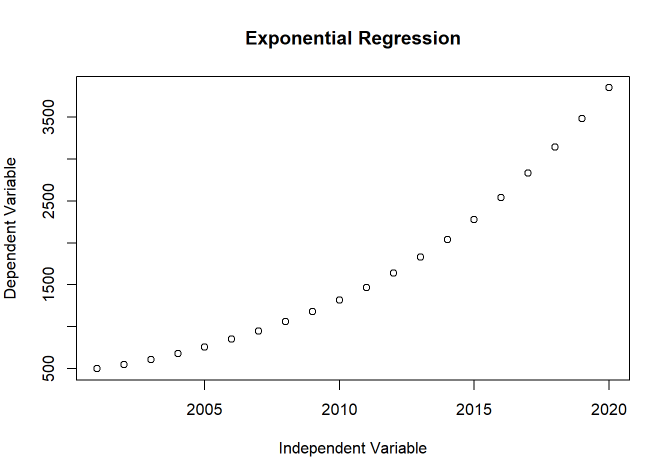    
⬆︎ 종속 변수가 지수적으로 변화하는 관계 모델링       
> 사용 방법      
1. 종속 변수 Y에 로그함수를 적용
2. 로그 변환된 Y와 기존의 독립변수 X에 대해 선형 회귀 적용
=> 모델이 ln Y(로그 변환된 Y)와 X의 선형 관계를 학습
3. Y값을 예측 시, 모델이 예측한 Y값에 지수함수$(e^x)$를 적용하여 로그 변환하기 전 Y로 변형

##### <span style="background-color:#FFC0CB; color:#000000; padding:4px; border-radius:5px;"> 3-3. 로그 회귀모델(log regression model)  </span>
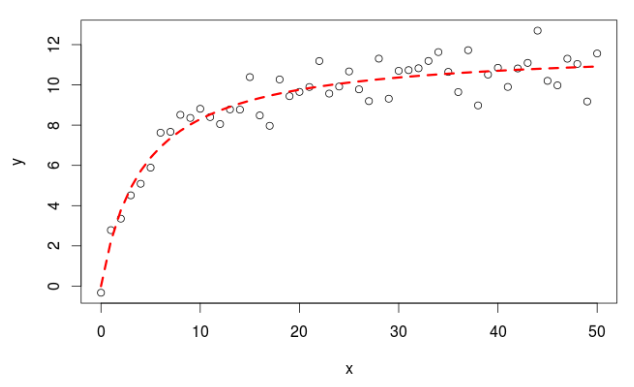      

⬆︎ 종속 변수와 독립 변수 간의 관계가 로그 함수를 통해 더 잘 표현될 때    
> 사용 방법      
1. 독립 변수 X에 로그함수를 적용
2. 선형 회귀를 적용

##### <span style="background-color:#FFC0CB; color:#000000; padding:4px; border-radius:5px;"> 3-4. 스플라인 회귀 (Spline Regression)  </span>
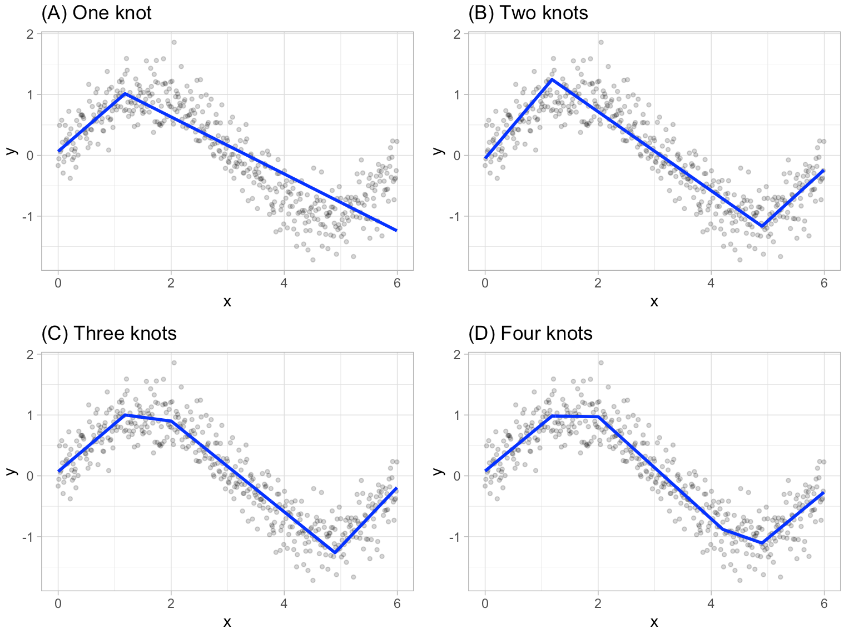      

⬆︎ 데이터를 구간별로 나누고 각 구간에서 다른 선형 또는 비선형 함수를 적용하여 예측
> 사용 방법
1. 전체 데이터 범위를 여러 구간으로 나눔
2. 각 구간에 대해 별도의 회귀 모델 적용
* 구간 경계에서의 연속성 유지!

### 4. 회귀 모델링 프로세스

##### <span style="background-color:#FF69B4; color:#000000; padding:4px; border-radius:5px;"> 1. 사전 검증 </span>
- 데이터 탐색 및 전처리 (결측치 처리, 이상치 처리)
- 회귀 분석의 기본 가정 6가지 검토

##### <span style="background-color:#FF69B4; color:#000000; padding:4px; border-radius:5px;"> 2. 모델 생성 및 모델 fit </span>
- 회귀 모델 생성, 모델 설정, 모델 학습
- 모델의 유의성 검정 (F-검정, T-검정)

##### <span style="background-color:#FF69B4; color:#000000; padding:4px; border-radius:5px;"> 3. 모델 성능 평가 </span>
- R-squared
- 회귀 분석 후 검증 가능한 가설 검토

##### <span style="background-color:#FF69B4; color:#000000; padding:4px; border-radius:5px;"> 4. 모델 성능 개선 </span>
- 필요 없는 변수 제거
- 비선형 모델 활용

> #### 전체적인 회귀 분석 프로세스       

사전 검증 -> 모델 생성 및 모델 fit -> 모델 평가 -> 모델 성능 개선 